In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

/home/yannick/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [137]:
im = cv2.imread('Test_data/frame06.jpg',0)

def callback(x):
    pass

a = 120
b = 500
cv2.namedWindow('image')
cv2.createTrackbar('filter','image',120,1000,callback)
cv2.createTrackbar('filter2','image',500,1000,callback)

while(True):
    
    edges= cv2.Canny(im,a,b) # a = 255, b = 720 
    ret, thresh = cv2.threshold(im, a, 255, cv2.THRESH_BINARY_INV)
    thresh_adapt = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,115,1)
    cv2.imshow("image",im)
    cv2.imshow("edges",edges)
    cv2.imwrite('edges.jpg',thresh_adapt)
    _, contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    im2 = im.copy()
    a = cv2.getTrackbarPos('filter','image')
    b = cv2.getTrackbarPos('filter2','image')
    objects = np.zeros([im.shape[0],im.shape[1],3], 'uint8')
    center_points = []
    for c in contours:
        area = cv2.contourArea(c)
        if area >= 1:
            cv2.drawContours(objects,[c],-1,(255,0,0),-1)

            M = cv2.moments(c)
            cx = int( M['m10']/M['m00'])
            cy = int( M['m01']/M['m00'])
            print "x ", cx, " y ", cy
            center_points.append((cx,cy))
            cv2.circle(objects,(cx,cy),4,(0,0,255),-1)
    print center_points
    cv2.imshow('objects',objects)
    cv2.imwrite('objects.jpg',objects)
    
    key = cv2.waitKey(1) & 0xFFFF
    
    if key == 27:
        break;
cv2.waitKey(0)
cv2.destroyAllWindows()

x  605  y  385
x  450  y  361
x  450  y  361
x  362  y  353
x  361  y  353
x  277  y  347
x  277  y  347
x  116  y  333
x  116  y  333
x  199  y  340
x  74  y  334
x  73  y  336
x  530  y  444
x  16  y  242
x  597  y  244
x  15  y  204
x  96  y  267
x  598  y  110
x  512  y  155
x  560  y  98
x  586  y  389
x  536  y  305
x  545  y  432
[(605, 385), (450, 361), (450, 361), (362, 353), (361, 353), (277, 347), (277, 347), (116, 333), (116, 333), (199, 340), (74, 334), (73, 336), (530, 444), (16, 242), (597, 244), (15, 204), (96, 267), (598, 110), (512, 155), (560, 98), (586, 389), (536, 305), (545, 432)]
x  605  y  385
x  450  y  361
x  450  y  361
x  362  y  353
x  361  y  353
x  277  y  347
x  277  y  347
x  116  y  333
x  116  y  333
x  199  y  340
x  74  y  334
x  73  y  336
x  530  y  444
x  16  y  242
x  597  y  244
x  15  y  204
x  96  y  267
x  598  y  110
x  512  y  155
x  560  y  98
x  586  y  389
x  536  y  305
x  545  y  432
[(605, 385), (450, 361), (450, 361), (362, 353), (3

In [138]:
center_points = list(set(center_points))
print center_points[0][0]

116


In [139]:
def slope_function(y1,y2,x1,x2):
    if x2 != x1:
        return float(y2-y1)/float(x2-x1)
    else:
        return 0.
    
def distance_function(x1,x2,y1,y2):
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

In [140]:
x = len(center_points)
loop = 0
flag = 0
points = []
for i in xrange(len(center_points)):
    for j in xrange(len(center_points)):
            
        if j > i:
            distance = distance_function(center_points[j][0],center_points[i][0],center_points[j][1],center_points[i][1])
            
            if distance <= 12:
                print j
                points.append(center_points[j])
                
print points
print x

16
13
[(362, 353), (74, 334)]
20


In [141]:
for j in points:
    center_points.remove(j)
print len(center_points)

18


In [142]:
print len(center_points)

18


In [143]:
center_points = np.array(center_points)
print center_points

[[116 333]
 [199 340]
 [597 244]
 [361 353]
 [450 361]
 [277 347]
 [536 305]
 [545 432]
 [512 155]
 [ 96 267]
 [598 110]
 [605 385]
 [ 73 336]
 [560  98]
 [530 444]
 [ 15 204]
 [586 389]
 [ 16 242]]


In [144]:
print center_points
center_points
im = cv2.imread('Test_data/frame06.jpg')
im2 = im.copy()
length = 0
slopes = []
x,y,x1,y1,m = sp.symbols('x,y,x1,y1,m')
eq = (y-y1)-(m*(x-x1))  
min_error = 1000
for i in xrange(len(center_points)):
    for j in xrange(len(center_points)):
        if j > i:
            #print center_points[j,0],center_points[i,0],center_points[j,1],center_points[i,1]
            slope = slope_function(center_points[j,1],center_points[i,1],center_points[j,0],center_points[i,0])

            eq1 = eq.subs({y1:center_points[i,1],x1:center_points[i,0],m:slope})
            print "iteration",j
            counter = 0
            points = []
            distlist = []
          
            error =0
            for k in xrange(len(center_points)):
                dist = eq1.subs({x:center_points[k,0],y:center_points[k,1]})
                
                if abs(dist) <= 7:
                    error += abs(dist)
                    #print dist
                    counter += 1
                    distlist.append(dist)
                    points.append(center_points[k])
            
            
            if counter >= 5:
                print "error =", error      
                min_error = min(min_error,error)
                if min_error == error:
                    final_five_points = points
                im2 = im.copy()
                #print distlist
                for it,p in enumerate(points):
                    cv2.circle(im2,(p[0],p[1]),4,(0,0,255),-1)
                    
                line_points = points
                #cv2.imshow('objects',im2)
                #cv2.waitKey(0)
                #cv2.destroyAllWindows()
                
            print " "
            
            
            distance = distance_function(center_points[j,0],center_points[i,0],center_points[j,1],center_points[i,1])
            if slope <= 1.0 and slope >= -1.0:
                slopes.append((round(slope,2),round(distance,2)))
             
print min_error
slopes = np.array(slopes)
#print "slopes", slopes
length /= 4
dist = int(length/2.0)+10
minimum = min(center_points[:,0])
maximum = max(center_points[:,0])
x_min = min(center_points[:,0])-dist if min(center_points[:,0])-dist > 0 else 0
x_max = max(center_points[:,0])+dist if max(center_points[:,0])+dist < im.shape[1] else im.shape[1]
y_min = min(center_points[:,1])-dist if min(center_points[:,1])-dist > 0 else 0
y_max = max(center_points[:,1])+dist if max(center_points[:,1])+dist < im.shape[0] else im.shape[0]
crop_tile = im[center_points[0,1]-dist:center_points[0,1]+dist,center_points[0,0]-dist:center_points[0,0]+dist]
crop= im[y_min:y_max,x_min:x_max]
cv2.imshow('objects',im2)
cv2.imshow("tile",crop_tile)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[116 333]
 [199 340]
 [597 244]
 [361 353]
 [450 361]
 [277 347]
 [536 305]
 [545 432]
 [512 155]
 [ 96 267]
 [598 110]
 [605 385]
 [ 73 336]
 [560  98]
 [530 444]
 [ 15 204]
 [586 389]
 [ 16 242]]
iteration 1
error = 7.87951807228910
 
iteration 2
 
iteration 3
error = 8.32653061224494
 
iteration 4
error = 7.68862275449101
 
iteration 5
error = 9.30434782608694
 
iteration 6
 
iteration 7
 
iteration 8
 
iteration 9
 
iteration 10
 
iteration 11
error = 17.0204498977505
 
iteration 12
 
iteration 13
 
iteration 14
 
iteration 15
 
iteration 16
error = 14.3361702127660
 
iteration 17
 
iteration 2
 
iteration 3
error = 8.04938271604937
 
iteration 4
error = 7.62549800796813
 
iteration 5
error = 3.51282051282050
 
iteration 6
 
iteration 7
 
iteration 8
 
iteration 9
 
iteration 10
 
iteration 11
error = 21.7266009852217
 
iteration 12
 
iteration 13
 
iteration 14
 
iteration 15
 
iteration 16
error = 12.7906976744185
 
iteration 17
 
iteration 3
 
iteration 4
 
iteration 5
 
iterat

In [145]:
print final_five_points
print np.array(line_points)
center_points = np.array(line_points)
print center_points

[array([116, 333]), array([199, 340]), array([361, 353]), array([450, 361]), array([277, 347])]
[[199 340]
 [361 353]
 [277 347]
 [605 385]
 [586 389]]
[[199 340]
 [361 353]
 [277 347]
 [605 385]
 [586 389]]


In [146]:
x_middle = center_points[center_points[:,0].argsort()][2]
print x_middle

[361 353]


In [147]:
im2 = cv2.imread('Test_data/frame06.jpg')
for it,p in enumerate(final_five_points):
        cv2.circle(im2,(p[0],p[1]),4,(0,0,255),-1)
cv2.imshow('objects',im2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [165]:
for i in xrange(len(center_points)):
    for j in xrange(len(center_points)):
        if i != j:
            distance = distance_function(center_points[j,0],center_points[i,0],center_points[j,1],center_points[i,1])

length /= 4
dist = 84*2/3
print dist
center_points = np.array(final_five_points)

56


In [163]:
x_min = min(center_points[:,0])-dist if min(center_points[:,0])-dist > 0 else 0
x_max = max(center_points[:,0])+dist if max(center_points[:,0])+dist < im2.shape[1] else im2.shape[1]
y_min = min(center_points[:,1])-dist if min(center_points[:,1])-dist > 0 else 0
y_max = max(center_points[:,1])+dist if max(center_points[:,1])+dist < im2.shape[0] else im2.shape[0]
print x_min,x_max,y_min,y_max

crop= im2[y_min:y_max,x_min:x_max]
cv2.imshow("tile",crop)
cv2.waitKey(0)
cv2.destroyAllWindows()

61 505 278 416


In [170]:
cv2.imshow("image",crop)
thresh_adapt = cv2.adaptiveThreshold(crop, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,115,1)
ret, thresh = cv2.threshold(crop, 200, 255, cv2.THRESH_BINARY_INV)
cv2.imshow("tresh", thresh)
cv2.imshow("adapt",thresh_adapt)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: /home/travis/miniconda/conda-bld/conda_1485299288502/work/opencv-3.2.0/modules/imgproc/src/thresh.cpp:1446: error: (-215) src.type() == CV_8UC1 in function adaptiveThreshold


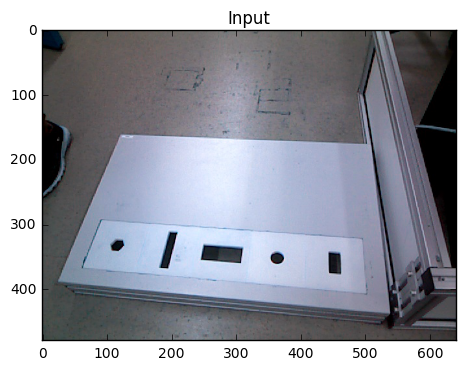

[[  32.   30.]
 [ 426.   32.]
 [  10.  105.]
 [ 444.  110.]]


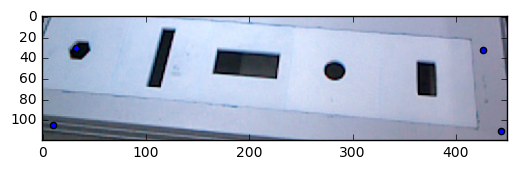

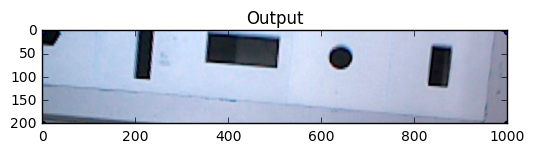

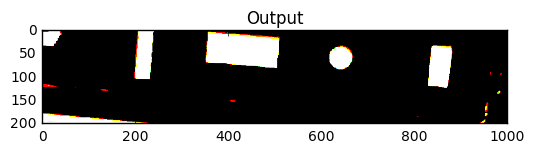

In [175]:
img = cv2.imread('Test_data/frame06.jpg')
crop = img[300:420,80:530]
cv2.imwrite('cropped.jpg',crop)
rows,cols,ch = img.shape
plt.imshow(img),plt.title('Input')
plt.show()
pts1 = np.float32([[32,30],[426,32],[10,105],[444,110]])
print pts1

plt.scatter(pts1[:,0],pts1[:,1])
plt.imshow(crop)
plt.show()

def homography(im,pts1):
    pts2 = np.float32([[0,0],[1000,0],[0,200],[1000,200]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(crop,M,(1000,200))
    cv2.imwrite('warped.jpg',dst)
    ret, thresh = cv2.threshold(dst, 120, 255, cv2.THRESH_BINARY_INV)
    #thresh_adapt = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,115,1)
    
    plt.scatter(pts2[:,0],pts2[:,1]),plt.imshow(dst),plt.title('Output')
    plt.show()
    plt.imshow(thresh),plt.title('Output')
    plt.show()

homography(crop,pts1)

In [21]:
def Contours(im):
    _, contours, hierarchy = cv2.findContours(im,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    im2 = im.copy()
    
    objects = np.zeros([im.shape[0],im.shape[1],3], 'uint8')
    center_points = []
    
    for c in contours:
        area = cv2.contourArea(c)
        if area >= 20000 and area <= 100000:
            cv2.drawContours(objects,[c],-1,(255,255,0),-1)
            M = cv2.moments(c)
            cx = int( M['m10']/M['m00'])
            cy = int( M['m01']/M['m00'])
            #print "x ", cx, " y ", cy
            center_points.append((cx,cy))
            #cv2.circle(objects,(cx,cy),4,(0,0,255),-1)
            
    print center_points
    
    cv2.imshow('objects',objects)
    return objects

In [22]:
im = cv2.imread('Data/frame0023.jpg',0)
centers = Contours(im)
adapt = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,101,1)
centers = Contours(adapt)
median = cv2.medianBlur(adapt,3)
#centers = Contours(median)
cv2.imshow("image",median)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'copy'

In [167]:
def corner_finding(im):
    corners = cv2.cornerHarris(im,2,3,0.04)
    print corners
    for c in corners:
        x,y = c.ravel()
        cv2.circle(im,(x,y),3,(255,0,0),-1)
    cv2.imshow("Corner",im)
    return np.squeeze(corners)

In [168]:
a = 3
#cv2.namedWindow('image')
gray = crop.copy()
#hsv = cv2.cvtColor(crop,cv2.COLOR_BGR2HSV)
#gray  = cv2.cvtColor(crop,cv2.COLOR_BGR2GRAY)
#r = crop[:,:,0]
#g = crop[:,:,1]
#b = crop[:,:,2]
adapt = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,51,1)
#a = cv2.getTrackbarPos('filter','image')
median = cv2.medianBlur(adapt,3)
gaussian = cv2.GaussianBlur(adapt,(3,3),0)
blur = cv2.blur(adapt,(5,5))
bila = cv2.bilateralFilter(adapt,9,75,75)

objects = Contours(adapt)

cv2.imshow("image",objects)
#cv2.imshow("median",median)
edges= cv2.Canny(median,100,720) # a = 255, b = 720 
#cv2.imshow("edges",edges)
#cv2.imshow("tile",hsv)
gray  = cv2.cvtColor(objects,cv2.COLOR_BGR2GRAY)
cornerss = cv2.cornerHarris(gray,2,3,0.04)

print cornerss
#corners = corner_finding(gray)
#print corners
#h = hsv[:,:,0]
#s = hsv[:,:,1]
#v = hsv[:,:,2]
#cv2.imshow("h",h)
#cv2.imshow("s",s)
#cv2.imshow("v",v)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: /home/travis/miniconda/conda-bld/conda_1485299288502/work/opencv-3.2.0/modules/imgproc/src/thresh.cpp:1446: error: (-215) src.type() == CV_8UC1 in function adaptiveThreshold


In [ ]:
crop_s = crop.shape
corner_points = np.array([[0,0],[0,crop_s[0]],[crop_s[1],0],[crop_s[1],crop_s[0]]])
minimum = np.zeros((4,2))
im = crop.copy()
print minimum
for j in xrange(4):
    for i,x in enumerate(corners):
        if distance_function(x[0],corner_points[j,0],x[1],corner_points[j,1]) > minimum[j,0]:
            minimum[j,0] = distance_function(x[0],corner_points[j,0],x[1],corner_points[j,1]) 
            minimum[j,1] = i 
            
print minimum[:,1]
detected_corners = np.zeros((4,2))
for i in xrange(4):
    detected_corners[i] = corners[minimum[i,1],:]
    
print detected_corners

for p in detected_corners:
        x,y = p
        print x,y
        cv2.circle(im,(int(x),int(y)),3,(255,0,0),-1)
cv2.imshow("Corner",im)
cv2.waitKey(0)
cv2.destroyAllWindows()